<small><i>This notebook was put together by [Steve Tang](https://stevetang92.wordpress.com/) A helpful data can be found at [GitHub](https://github.com/jakevdp/sklearn_pycon2014/).</i></small>

## Simple Changes
Below is an example of a the iris dataset being trained by a K nearist neighbefor classifer. The code below it is only slightly modified, the modifications allow it to train a support vector classifer. Scikit-Learn allows us to just change a couple lines of code to train our data.

In [14]:
from sklearn import neighbors, datasets
# Just a randomly set of parameters
unknown_iris = [[3, 5, 4, 2]]
# Load the iris dataset
iris = datasets.load_iris()
# Assign the features and classifiation
X, y = iris.data, iris.target
# Choosing KNeighbors as Classifier
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
# Train Classifier
clf.fit(X, y)
# Print out the which iris the classifier predicts it to be.
print ('KNeighbors Classifier predicts unknown_iris to be of type:', iris.target_names[clf.predict(unknown_iris)])

KNeighbors Classifier predicts unknown_iris to be of type: ['virginica']


In [15]:
from sklearn import datasets
from sklearn.svm import SVC
# Just a randomly set of parameters
unknown_iris = [[3, 5, 4, 2]]
# Load the iris dataset
iris = datasets.load_iris()
# Assign the features and classifiation
X, y = iris.data, iris.target
# Choosing Support Vectors as Classifier
clf = SVC()
# Train Classifier
clf.fit(X, y) 
# Print out the which iris the classifier predicts it to be.
print('Support Vector Classifier predicts unknown_iris to be of type:', iris.target_names[clf.predict(unknown_iris)])

Support Vector Classifier predicts unknown_iris to be of type: ['virginica']


## Digits Dataset
Scikit-Learn has a digit dataset that is simular to Mnist data set given in Andrew Ng's Coursea class on Machine Learning.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
# Loads the data for digits
digits = load_digits()
# Gives us information on the dataset
digits.keys()

# Gives us the dimensions of the input data
X = digits.data
# Gives us the dimensions of the output data
y = digits.target
print(X.shape)
print(y.shape)





(1797, 64)
(1797,)


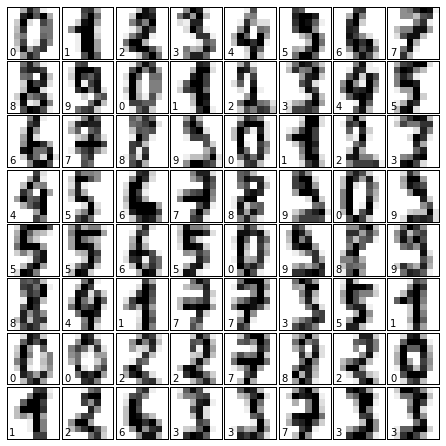

In [17]:
import matplotlib.pyplot as plt
# Set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


## Results of Difference Trials with SVMs and Random Forest 
With SVM We tried two different kernels: linear and radial basis function. While with random Random Forest Classifier we change the depth to see if we could see how increasing depth could help with over fitting.

SVC: kernel = linear
Accuracy = 0.971111111111
SVC: kernel = rbf
Accuracy = 0.486666666667
RF: max_depth = 4
Accuracy = 0.86
RF: max_depth = 8
Accuracy = 0.94
RF: max_depth = 12
Accuracy = 0.94


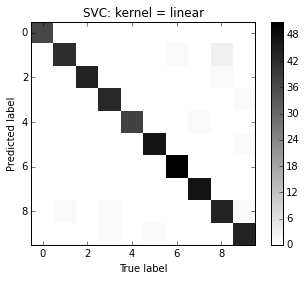

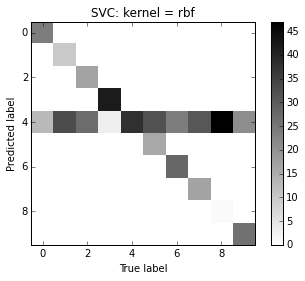

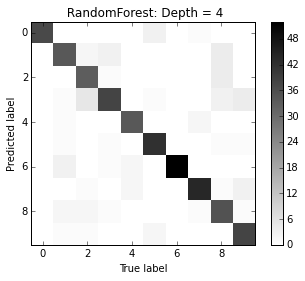

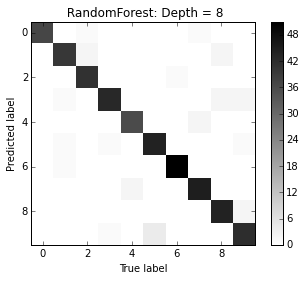

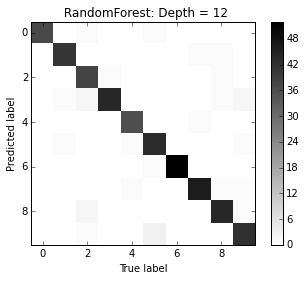

In [18]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier



# Divide data into test and traing datasets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# Running SVM with linear and radial basis function
for kernel in ['linear', 'rbf']:
    #Traing the model with Xtrain and ytrain
    clf = SVC(kernel=kernel).fit(Xtrain, ytrain)
    # Use trained Classifer to predict the test set
    ypred = clf.predict(Xtest)
    print("SVC: kernel = {0}".format(kernel))
    print("Accuracy =", metrics.accuracy_score(ytest, ypred))
    plt.figure()
    #Returns a graph of the confusion matrix to help us visualize errros if any. 
    plt.imshow(metrics.confusion_matrix(ypred, ytest),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title("SVC: kernel = {0}".format(kernel))
    
#Running RandomForestClassifier
for max_depth in [4, 8, 12]:
    #Traing the model with Xtrain and ytrain
    clf = RandomForestClassifier(max_depth=max_depth).fit(Xtrain, ytrain)
    # Use trained Classifer to predict the test set
    ypred = clf.predict(Xtest)
    print("RF: max_depth = {0}".format(max_depth))
    print("Accuracy =", metrics.accuracy_score(ytest, ypred))
    plt.figure()
    #Returns a graph of the confusion matrix to help us visualize errros if any. 
    plt.imshow(metrics.confusion_matrix(ypred, ytest),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(" RandomForest: Depth = {0}".format(max_depth))

# Comparing Different Classifiers
Sometimes it not always best to go just off of accuracy beacuse a dataset coule be may be 99 examples negitive resutls and one positive result. If you were to simply always guess negitive it would be 99 percent accurate but this would be a terrble way to go about the problem.   The code below will allow you test out RandomForestClassifier, KNeighborsClassifier, GaussianNB and  SVC with defult settings. It will return precision, recall and f1-score.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_digits

# Loads the data for digits
digits = load_digits()
# Gives us the dimensions of the input data
X = digits.data
# Gives us the dimensions of the output data
y = digits.target
# Divide data into test and traing datasets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# Run through each of the classifiers and prints precision, recall and f1-score
for Class in [RandomForestClassifier, KNeighborsClassifier, GaussianNB, SVC]:
    cls = Class().fit(Xtrain, ytrain)
    ypred = cls.predict(Xtest)
    print("-------------------------------------------")
    print(Class.__name__)
    print(metrics.classification_report(ypred, ytest))




-------------------------------------------
RandomForestClassifier
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        39
          1       0.98      0.89      0.93        47
          2       0.91      0.98      0.94        41
          3       0.96      0.88      0.91        49
          4       0.97      0.95      0.96        39
          5       0.96      0.98      0.97        47
          6       0.98      0.98      0.98        52
          7       0.96      0.96      0.96        48
          8       0.90      0.96      0.92        45
          9       0.85      0.93      0.89        43

avg / total       0.95      0.94      0.94       450

-------------------------------------------
KNeighborsClassifier
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.98      0.98      0.98        43
          2       0.98      1.00      0.99        43
          3     

# Results

# Random Forest
Random Forest classification did pretty well lowest percision was 0.92 and lowest percision was 0.90 so we did pretty well. Averages of percision, recall and f1 score were all 95 percent.

# KNeighbors Classifier
KNeighbors classifier out did Random Forest with 0.98 in percision, recall and f1 score so Kneighbors Classifier seems to work well, but later one we will over a possible problem of over fitting. 

# GaussianNB
Gaussian Naive Bayes had a little more trouble compared to Random Forest and KNeighbors, we can see taht precision was really low in identifying twos with a precision of .39 meaning that we have miss classified a large number of digits as twos but they were really some other digit. Also we had a .55 recall for our results on eights meaning classified a large number of eights as a different digit. Our overall f1 score was  0.81 so a decent score but we can see that with defult setting the previous two classifiers would be better.

GaussianNB
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.91      0.68      0.78        57
          2       0.39      1.00      0.56        17
          3       0.84      0.76      0.80        50
          4       0.71      0.93      0.81        29
          5       0.90      0.98      0.93        44
          6       1.00      0.95      0.97        55
          7       0.98      0.70      0.82        67
          8       0.77      0.55      0.64        67
          9       0.57      1.00      0.73        27

avg / total       0.86      0.81      0.81       450


# SVC

Using Suppport Vector Clasification can see that on average we can expect decent percision but recall on the other hand is not as good. We can see that SVC really stuggled with the digit 4 having precision at 1.0 means didnt label anyone digit a 4 unless it was actaully a 4 but a recall of .14 meaning we miss labeled a lot of our fours as a different digit
SVC
             precision    recall  f1-score   support

          0       0.65      1.00      0.79        24
          1       0.23      1.00      0.38        10
          2       0.39      1.00      0.56        17
          3       0.93      1.00      0.97        42
          4       1.00      0.14      0.25       269
          5       0.33      1.00      0.50        16
          6       0.54      1.00      0.70        28
          7       0.35      1.00      0.52        17
          8       0.02      1.00      0.04         1
          9       0.55      1.00      0.71        26

avg / total       0.83      0.49      0.43       450